Here we explore the sensitivity of the Mie solution to the input parameters

We start with the sensitivity to imaginary part of the refractive index (RI)

Let's see how the size parameter x is 2*pi*r/lambda changes for aerosols.
Take lambda 0.5 um (visible), r changes from 0.1 um to 10 um and larger (dust).
Then x goes from 1.25 to 125.

In [1]:
%load_ext autoreload
%autoreload 2

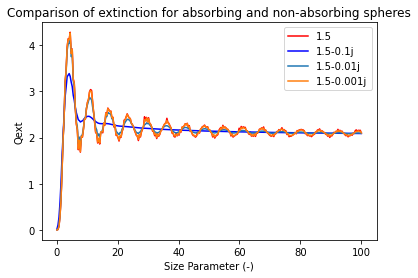

In [2]:
"""
Plot the extinction efficiency as a function of particle size
for non-absorbing and absorbing spheres
"""

import numpy as np
import matplotlib.pyplot as plt
import miepython

x = np.linspace(0.1,100,300)

# mie() will automatically try to do the right thing

qext, qsca, qback, g = miepython.mie(1.5,x)
plt.plot(x,qext,color='red',label="1.5")

qext, qsca, qback, g = miepython.mie(1.5-0.1j,x)
plt.plot(x,qext,color='blue',label="1.5-0.1j")

qext, qsca, qback, g = miepython.mie(1.5-0.01j,x)
plt.plot(x,qext,label="1.5-0.01j")

qext, qsca, qback, g = miepython.mie(1.5-0.001j,x)
plt.plot(x,qext,label="1.5-0.001j")

plt.title("Comparison of extinction for absorbing and non-absorbing spheres")
plt.xlabel("Size Parameter (-)")
plt.ylabel("Qext")
plt.legend()
plt.show()


The same for the real part

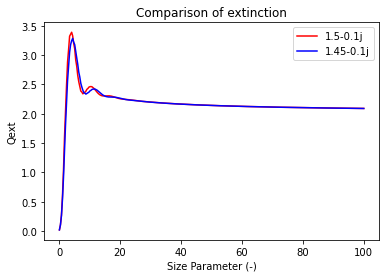

In [3]:
qext, qsca, qback, g = miepython.mie(1.5-0.1j,x)
plt.plot(x,qext,color='red',label="1.5-0.1j")

qext, qsca, qback, g = miepython.mie(1.45-0.1j,x)
plt.plot(x,qext,color='blue',label="1.45-0.1j")

plt.title("Comparison of extinction")
plt.xlabel("Size Parameter (-)")
plt.ylabel("Qext")
plt.legend()
plt.show()

Compare different dust RIs

In [4]:
from climpy.utils.refractive_index_utils import get_dust_ri, get_spectral_refractive_index
wrf_dust_ri_vo = get_spectral_refractive_index('soil', sign_convention='negative')  # RI from WRF code
obs_dust_ri_vo = get_dust_ri(sign_convention='negative')  # recent RI from observations

In [5]:
print(wrf_dust_ri_vo)
print(obs_dust_ri_vo)

{'ri': (1.55-0.003j), 'wl': 0.5, 'key': 'soil'}
{'ri': array([1.54 -0.0015j, 1.54 -0.0006j, 1.602-0.28j  ]), 'wl': array([ 0.52,  0.95, 10.  ])}


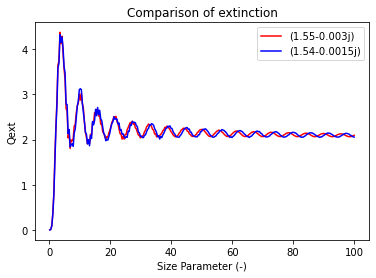

In [16]:
ri = wrf_dust_ri_vo['ri']
qext, qsca, qback, g = miepython.mie(ri,x)
plt.plot(x,qext,color='red',label=ri)

ri = obs_dust_ri_vo['ri'][0]
qext, qsca, qback, g = miepython.mie(ri,x)
plt.plot(x,qext,color='blue',label=ri)

plt.title("Comparison of extinction")
plt.xlabel("Size Parameter (-)")
plt.ylabel("Qext")
plt.legend()
plt.show()